In [154]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

##  讀入政府開放平台上的來台旅客資料

#### 這次的作業是想從歷年來台的旅客人數和台灣GDP之間看兩者的關係

In [155]:
df = pd.read_csv('https://gis.taiwan.net.tw/od/01_PRD/%E6%AD%B7%E5%B9%B4%E4%BE%86%E5%8F%B0%E6%97%85%E5%AE%A2%E7%B5%B1%E8%A8%88.csv',encoding = "big5")
df

,年別,總計人數,總計成長率,總計指數,外籍旅客人數,外籍旅客成長率,外籍旅客占總計百分比,華僑旅客人數,華僑旅客成長率,華僑旅客占總計百分比
0,1956,"14,974",-,0.81,"11,734",-,78.36,"3,240",-,21.64
1,1957,"18,159",21.27,0.98,"14,068",19.89,77.47,"4,091",26.27,22.53
2,1958,"16,709",-7.99,0.90,"15,557",10.58,93.11,"1,152",-71.84,6.89
3,1959,"19,328",15.67,1.04,"17,634",13.35,91.24,"1,694",47.05,8.76
4,1960,"23,636",22.29,1.27,"20,796",17.93,87.98,"2,840",67.65,12.02
5,1961,"42,205",78.56,2.28,"34,831",67.49,82.53,"7,374",159.65,17.47
6,1962,"52,304",23.93,2.82,"44,625",28.12,85.32,"7,679",4.14,14.68
7,1963,"72,024",37.7,3.88,"61,348",37.47,85.18,"10,676",39.03,14.82
8,1964,"95,481",32.57,5.15,"83,017",35.32,86.95,"12,464",16.75,13.05
9,1965,"133,666",39.99,7.21,"118,460",42.69,88.62,"15,206",22,11.38


### 去掉逗號，把字串轉成浮點數

In [156]:
import locale

locale.setlocale(locale.LC_NUMERIC, '')
df['總計人數'] = df['總計人數'].apply(locale.atof)
df

,年別,總計人數,總計成長率,總計指數,外籍旅客人數,外籍旅客成長率,外籍旅客占總計百分比,華僑旅客人數,華僑旅客成長率,華僑旅客占總計百分比
0,1956,14974.0,-,0.81,"11,734",-,78.36,"3,240",-,21.64
1,1957,18159.0,21.27,0.98,"14,068",19.89,77.47,"4,091",26.27,22.53
2,1958,16709.0,-7.99,0.90,"15,557",10.58,93.11,"1,152",-71.84,6.89
3,1959,19328.0,15.67,1.04,"17,634",13.35,91.24,"1,694",47.05,8.76
4,1960,23636.0,22.29,1.27,"20,796",17.93,87.98,"2,840",67.65,12.02
5,1961,42205.0,78.56,2.28,"34,831",67.49,82.53,"7,374",159.65,17.47
6,1962,52304.0,23.93,2.82,"44,625",28.12,85.32,"7,679",4.14,14.68
7,1963,72024.0,37.7,3.88,"61,348",37.47,85.18,"10,676",39.03,14.82
8,1964,95481.0,32.57,5.15,"83,017",35.32,86.95,"12,464",16.75,13.05
9,1965,133666.0,39.99,7.21,"118,460",42.69,88.62,"15,206",22,11.38


### 去除用不到的數據，僅留下總計人數

In [146]:
df1 = df['總計人數']
df2 = df1[25:]
df2.index = range(36)
df2

0      1409465.0
1      1419178.0
2      1457404.0
3      1516138.0
4      1451659.0
5      1610385.0
6      1760948.0
7      1935134.0
8      2004126.0
9      1934084.0
10     1854506.0
11     1873327.0
12     1850214.0
13     2127249.0
14     2331934.0
15     2358221.0
16     2372232.0
17     2298706.0
18     2411248.0
19     2624037.0
20     2831035.0
21     2977692.0
22     2248117.0
23     2950342.0
24     3378118.0
25     3519827.0
26     3716063.0
27     3845187.0
28     4395004.0
29     5567277.0
30     6087484.0
31     7311470.0
32     8016280.0
33     9910204.0
34    10439785.0
35    10690279.0
Name: 總計人數, dtype: float64

## 讀入國民所得資料

#### 這邊選取與旅遊相關的住宿與餐飲來當作外國旅客來台產生的消費行為

這邊也進行資料處篩選與處理，要注意資料的年份長度與要進行迴歸分析的資料長度是否相同

這裡GDP的單位為百萬元新台幣

In [147]:
gdp = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=6693&md5_url=c342a13ea08537d9b551bd4247fe9898')
gdp

,Item,TIME_PERIOD,FREQ,TYPE,Item_VALUE
0,A.農、林、漁、牧業#生產總額(新台幣百萬元),1981,A,原始值,269102.0
1,A.農、林、漁、牧業#中間消費(新台幣百萬元),1981,A,原始值,136413.0
2,A.農、林、漁、牧業#國內生產毛額(新台幣百萬元),1981,A,原始值,132689.0
3,A.農、林、漁、牧業#生產及進口稅淨額(新台幣百萬元),1981,A,原始值,1481.0
4,A.農、林、漁、牧業#固定資本消耗(新台幣百萬元),1981,A,原始值,5601.0
5,A.農、林、漁、牧業#受僱人員報酬(新台幣百萬元),1981,A,原始值,41554.0
6,A.農、林、漁、牧業#營業盈餘(新台幣百萬元),1981,A,原始值,84053.0
7,AA.農耕業#生產總額(新台幣百萬元),1981,A,原始值,120916.0
8,AA.農耕業#中間消費(新台幣百萬元),1981,A,原始值,36925.0
9,AA.農耕業#國內生產毛額(新台幣百萬元),1981,A,原始值,83991.0


In [148]:
gdp1 = gdp[gdp.Item.str.contains('I.住宿及餐飲業#生產總額')]
gdp1 = gdp1[:36]
gdp1.index = range(36)
gdp1

,Item,TIME_PERIOD,FREQ,TYPE,Item_VALUE
0,I.住宿及餐飲業#生產總額(新台幣百萬元),1981,A,原始值,28780.0
1,I.住宿及餐飲業#生產總額(新台幣百萬元),1982,A,原始值,35603.0
2,I.住宿及餐飲業#生產總額(新台幣百萬元),1983,A,原始值,43611.0
3,I.住宿及餐飲業#生產總額(新台幣百萬元),1984,A,原始值,54573.0
4,I.住宿及餐飲業#生產總額(新台幣百萬元),1985,A,原始值,64649.0
5,I.住宿及餐飲業#生產總額(新台幣百萬元),1986,A,原始值,74349.0
6,I.住宿及餐飲業#生產總額(新台幣百萬元),1987,A,原始值,88626.0
7,I.住宿及餐飲業#生產總額(新台幣百萬元),1988,A,原始值,95021.0
8,I.住宿及餐飲業#生產總額(新台幣百萬元),1989,A,原始值,114833.0
9,I.住宿及餐飲業#生產總額(新台幣百萬元),1990,A,原始值,135241.0


In [149]:
gdp2 = gdp1['Item_VALUE']
gdp2

0      28780.0
1      35603.0
2      43611.0
3      54573.0
4      64649.0
5      74349.0
6      88626.0
7      95021.0
8     114833.0
9     135241.0
10    155542.0
11    175573.0
12    195171.0
13    218040.0
14    244176.0
15    280624.0
16    314042.0
17    342971.0
18    365931.0
19    393829.0
20    398103.0
21    391114.0
22    382404.0
23    407478.0
24    432023.0
25    453296.0
26    481063.0
27    503661.0
28    518707.0
29    580843.0
30    654503.0
31    701974.0
32    735741.0
33    775063.0
34    808854.0
35    835591.0
Name: Item_VALUE, dtype: float64

### 把兩個整理好的數據放到同一個DataFrame中

In [150]:
dfx = pd.concat([df2,gdp2], axis=1)
dfx

,總計人數,Item_VALUE
0,1409465.0,28780.0
1,1419178.0,35603.0
2,1457404.0,43611.0
3,1516138.0,54573.0
4,1451659.0,64649.0
5,1610385.0,74349.0
6,1760948.0,88626.0
7,1935134.0,95021.0
8,2004126.0,114833.0
9,1934084.0,135241.0


#### 看一下原本的資料分布，資料有點少

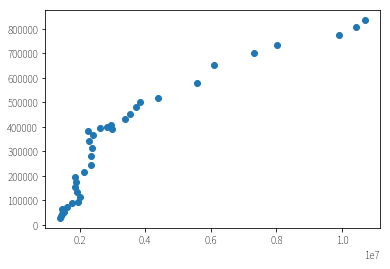

In [151]:
x = np.array(dfx['總計人數'])
y = np.array(dfx['Item_VALUE'])
plt.scatter(x,y)

### 進行迴歸分析
用三成資料作為驗證資料，七成來建構迴歸模型

In [152]:
X = x.reshape(len(x), 1)
regr = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 9487)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

Text(0.5, 1.0, '旅遊行為與旅客人次之迴歸分析')

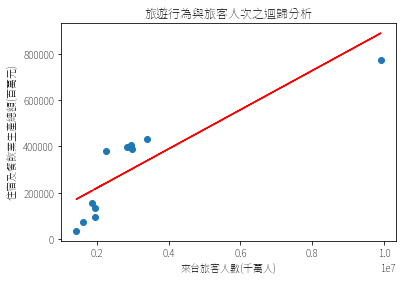

In [159]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, 'r')
plt.xlabel('來台旅客人數(千萬人)')
plt.ylabel('住宿及餐飲業生產總額(百萬元)')
plt.title('旅遊行為與旅客人次之迴歸分析')

#### 其實看原本的資料就可以知道兩者之間的關係大致是正相關，最後預測做出來也是正相關，但因為數據太少，代表性可能不足，下次選擇數據還是要挑樣本數多一點的